# Preço de Casas em San Francisco CA

O dataset do preço de casas vendidas na região de San Francisco no estado da Califórnia, foi estraído do banco de dados de vendas de casas na área Bay (Bay Area Home Sales Database) e do site Zillow <https://www.zillow.com>. O dataset possui informações de casas vendidas entre Janeiro de 2013 e Dezembro de 2015. O dataset está disponível nesse link: <https://raw.githubusercontent.com/RuiChang123/Regression_for_house_price_estimation/master/final_data.csv>.

As análises deste notebook foram extraídas de: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878

### Pré processamento dos dados

In [40]:
import pandas as pd
sf = pd.read_csv('bay_area_dataset.csv')
sf.head()

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


Existem alguns atributos que não são relevantes para calcular o preço de uma casa, por exemplo os campos “info”, “z_address”, “zipcode”(Nós já temos o atributo “neighborhood” que signficia vizinhança, isto é, bairro. ), “zipid” e “zestimate”(Este é o preço estimado pelo Zillow, nós não queremos nosso modelo afetado por isso), então, iremos descartá-los.

In [42]:
sf.drop(sf.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)
sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11329 entries, 0 to 11329
Data columns (total 13 columns):
address          11329 non-null object
bathrooms        11329 non-null float64
bedrooms         11329 non-null float64
finishedsqft     11329 non-null float64
lastsolddate     11329 non-null object
lastsoldprice    11329 non-null float64
latitude         11329 non-null float64
longitude        11329 non-null float64
neighborhood     11329 non-null object
totalrooms       11329 non-null float64
usecode          11329 non-null object
yearbuilt        11329 non-null float64
zindexvalue      11329 non-null object
dtypes: float64(8), object(5)
memory usage: 1.2+ MB


O tipo de dado do atributo “zindexvalue” deveria ser numérico, então vamos mudá-lo

In [43]:
sf['zindexvalue'] = sf['zindexvalue'].str.replace(',', '')
sf['zindexvalue'] = pd.to_numeric(sf['zindexvalue'])
sf.lastsolddate.min(), sf.lastsolddate.max()

('01/02/2013', '12/31/2015')

O período de vendas do dataset foi entre Janeiro de 2013 e Dezembro de 2015.
Agora usaremos o método describe() para mostrar um sumário estatistico dos valores numéricos.

In [81]:
sf[sf['lastsoldprice'] < 100000]

,bathrooms,bedrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue,lastsoldprice,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_Miscellaneous,usecode_Mobile,usecode_MultiFamily2To4,usecode_MultiFamily5Plus,usecode_SingleFamily,usecode_Townhouse,group_high_price_low_freq,group_low_price
1248,1.0,2.0,1000.0,5.0,1900.0,731900,3000.0,0,0,0,0,0,0,0,1,0,0,1
2092,1.0,2.0,1204.0,5.0,1890.0,1470700,18000.0,1,0,0,0,0,0,0,0,0,1,0
3111,4.0,3.0,3131.0,8.0,2010.0,1926800,10000.0,0,0,0,0,0,0,0,1,0,0,1
3496,2.0,3.0,1605.0,5.0,2014.0,1202900,12000.0,1,0,0,0,0,0,0,0,0,0,0
3699,1.0,1.0,780.0,4.0,1993.0,839200,74000.0,1,0,0,0,0,0,0,0,0,0,0
4039,2.5,4.0,2400.0,6.0,1930.0,1304500,5700.0,0,0,0,0,0,0,0,1,0,0,1
4542,1.0,1.0,590.0,2.0,1920.0,795400,600.0,1,0,0,0,0,0,0,0,0,0,0
5065,2.0,3.0,1570.0,6.0,1926.0,1227600,5450.0,0,0,0,0,0,0,0,1,0,0,0
5083,1.0,2.0,885.0,3.0,2014.0,1264000,40000.0,1,0,0,0,0,0,0,0,0,0,0
5466,1.5,3.0,2300.0,8.0,1918.0,1480400,70000.0,0,0,0,0,0,0,0,1,0,0,1


In [53]:
sf[ sf['totalrooms'] > 50 ]

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue


In [79]:
sf.describe().round(2)

,bathrooms,bedrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue,lastsoldprice,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_Miscellaneous,usecode_Mobile,usecode_MultiFamily2To4,usecode_MultiFamily5Plus,usecode_SingleFamily,usecode_Townhouse,group_high_price_low_freq,group_low_price
count,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00,11327.00
mean,1.98,2.61,1583.25,5.99,1948.49,1320262.58,1264059.89,0.42,0.00,0.01,0.00,0.00,0.04,0.00,0.51,0.01,0.09,0.38
std,1.05,1.30,889.91,2.58,37.91,584863.85,1042160.51,0.49,0.02,0.11,0.04,0.01,0.20,0.01,0.50,0.08,0.29,0.49
min,0.50,0.00,1.00,1.00,1860.00,688100.00,535.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,1019.00,4.00,1916.00,982900.00,730000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,2.00,1362.00,5.00,1940.00,1211900.00,990000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,2.00,3.00,1876.00,7.00,1986.00,1480400.00,1450000.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
max,14.00,20.00,10236.00,33.00,2016.00,5333500.00,23889000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [50]:
sf = sf[ sf['totalrooms'] < 50]
sf = sf[ sf['finishedsqft'] < 20000]
sf.shape

(11327, 13)

O count (quantidade de valores não nulos), mean (média), min e max de cada coluna são intuitivos. O std mostra o desvio padrão, e os 25%, 50% e 75% mostram as porcentagens correspondentes.
Para tentar entender o tipo de dado que estamos lidando, vamos plotar um histograma para cada variável numérica.

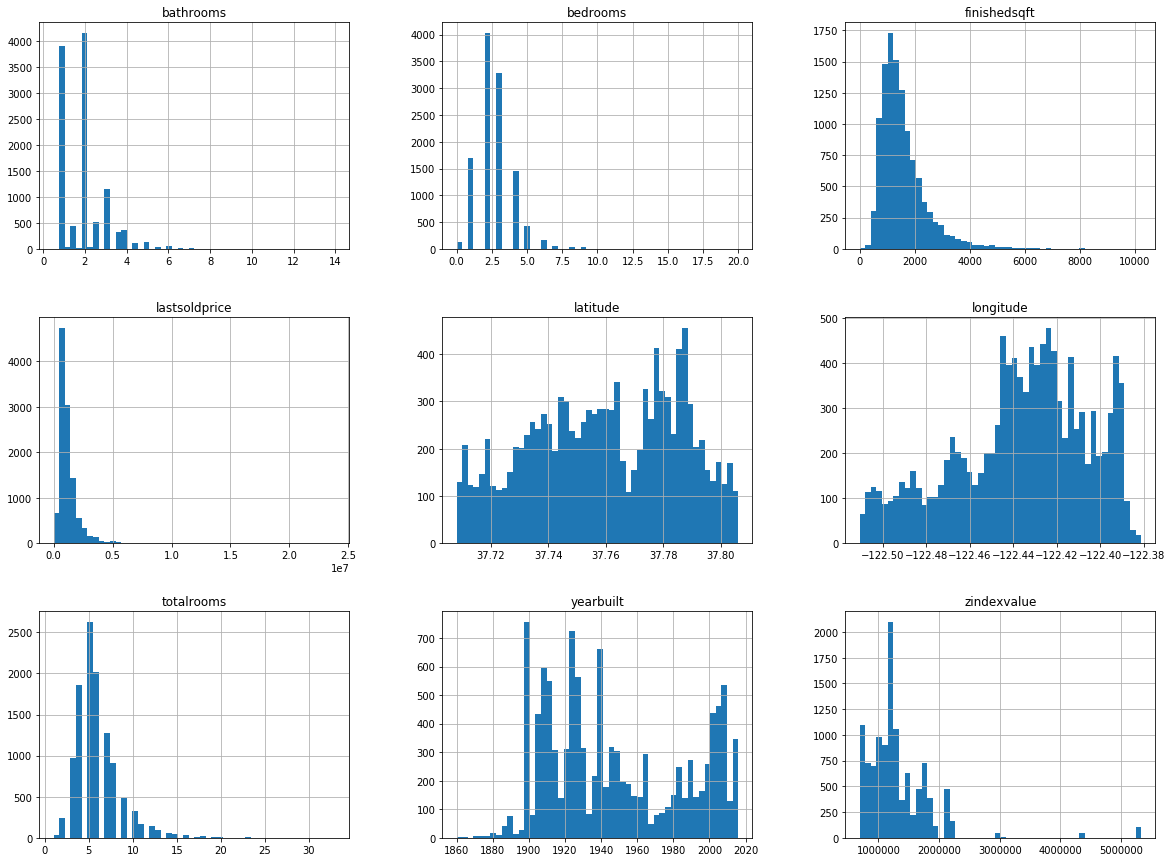

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
sf.hist(bins=50, figsize=(20,15))
plt.show()

Alguns dos histogramas estão um pouco enviesados para a direita, Mas isso não é anormal.
Vamos criar um gráfico de dispersão (scatter) com latitude e longitude para enxergar os dados:

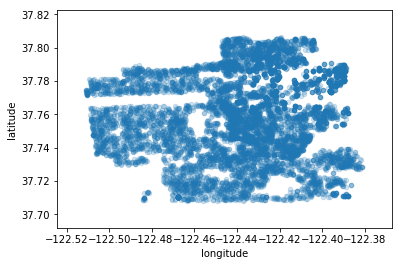

In [58]:
sf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2);

Agora vamos colorir o gráfico da área mais cara a menos cara:

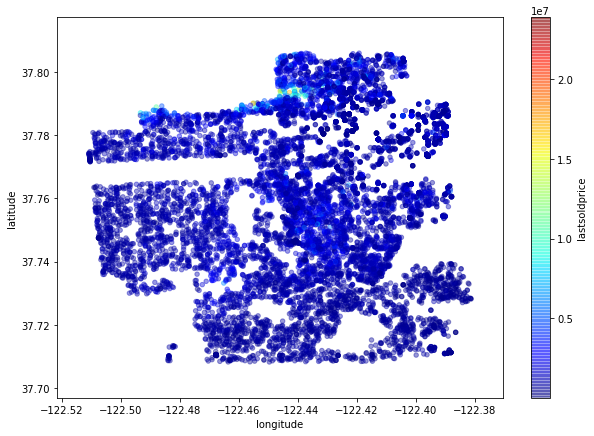

In [59]:
sf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False);

Esta imagem mostra que que as casas mais caras vendidas estão na área norte.
A variável que queremos estimar é “last sold price” (preço que o imóvel foi vendido pela ultima vez). Então vamos observar como cada independente variável se relaciona com a variável dependente.

In [60]:
corr_matrix = sf.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.672216
bathrooms        0.536911
zindexvalue      0.460411
totalrooms       0.437179
bedrooms         0.395452
latitude         0.283151
longitude       -0.052463
yearbuilt       -0.189096
Name: lastsoldprice, dtype: float64

O preço que o imóvel foi vendido pela última vez tende a aumentar quando o finished sqft (tamnho em pés quadrados da area construída da casa) e o número de banheiros (bathrooms) Aumenta. Você pode ver uma pequena correlação negativa entre o ano de construção e o preço que a casa foi vendida pela ultima vez. E finalmente, coeficientes pertos de 0 indica que não existe correlação linear.
Vamos agora visualizar a correlação de variáveis usando a função scatter_matrix do pandas. Nós iremos focar nas variáveis que mais se correlacionam.

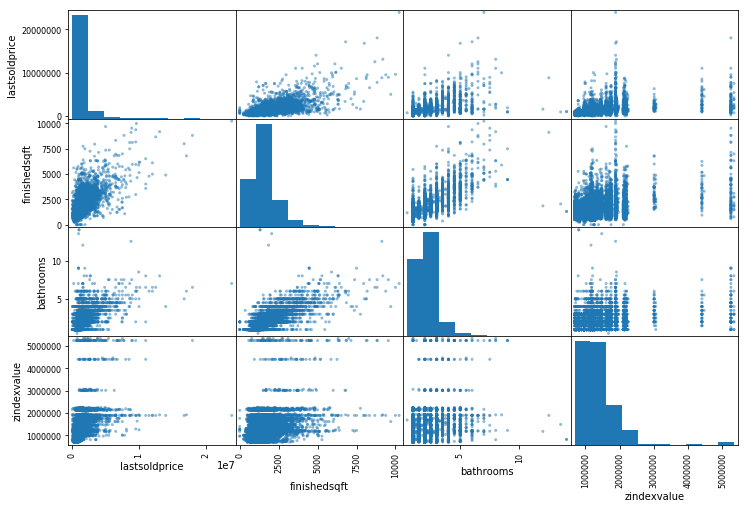

In [61]:
from pandas.plotting import scatter_matrix
attributes = ["lastsoldprice", "finishedsqft", "bathrooms", "zindexvalue"]
scatter_matrix(sf[attributes], figsize=(12, 8));

A variável que mais correlaciona com o preço que foi vendido a ultima vez é o finished sqft (area construída da casa), Então vamos observar essa correlação mais de perto.

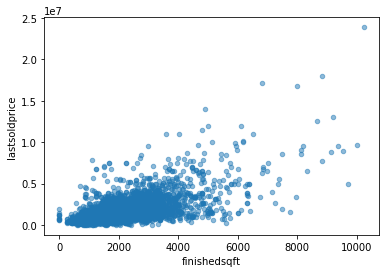

In [62]:
sf.plot(kind="scatter", x="finishedsqft", y="lastsoldprice", alpha=0.5);

A correlação é de fato muito forte; você pode claramente ver que o preço aumenta a medida que o tamanho da area construída amumenta e que os pontos não estão muito dispersos.
Por razões que cada casa tem tamanhos diferentes e cada vizinhança (bairro) tem um preço de casa diferente, O que nós precisamos é o preço das casas por pé quadrado (sqft). Então adicionaremos a variável “price_per_sqft” (preço por pé quadrado). Então iremos observar o quanto essa variável se correlaciona com a variável dependente.

In [64]:
sf['price_per_sqft'] = sf['lastsoldprice']/sf['finishedsqft']
corr_matrix = sf.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice     1.000000
finishedsqft      0.672216
bathrooms         0.536911
zindexvalue       0.460411
totalrooms        0.437179
bedrooms          0.395452
latitude          0.283151
price_per_sqft    0.005003
longitude        -0.052463
yearbuilt        -0.189096
Name: lastsoldprice, dtype: float64

Infelizmente, a nova variável price_per_sqft mostra apenas uma pequena correlação positiva com o preço. Mas ainda precisamos dessa variável para agrupar vizinhanças.
Existem 71 vizinhanças nesse conjunto de dados, então vamos agrupá-las.

In [65]:
len(sf['neighborhood'].value_counts())

71

Os próximos passos agrupam vizinhanças em 3 grupos distintos: 1. low price (preço baixo); 2. high price low frequency (preço alto frequencia baixa); 3. high price high frequency (preço alto frequência alta).

In [66]:
freq = sf.groupby('neighborhood').count()['address']
mean = sf.groupby('neighborhood').mean()['price_per_sqft']
cluster = pd.concat([freq, mean], axis=1)
cluster['neighborhood'] = cluster.index
cluster.columns = ['freq', 'price_per_sqft','neighborhood']
cluster.describe()

,freq,price_per_sqft
count,71.000000,71.000000
mean,159.535211,1664.977394
std,126.543254,3619.265512
min,3.000000,374.201197
25%,67.500000,613.337664
50%,123.000000,756.246284
75%,210.000000,985.156646
max,540.000000,26914.471572


Estas são as vizinhanças de preço baixo:

In [67]:
cluster1 = cluster[cluster.price_per_sqft < 756]
cluster1.index

Index(['Bayview', 'Central Richmond', 'Central Sunset', 'Crocker Amazon',
       'Daly City', 'Diamond Heights', 'Excelsior', 'Forest Hill',
       'Forest Hill Extension', 'Golden Gate Heights', 'Ingleside',
       'Ingleside Heights', 'Ingleside Terrace', 'Inner Parkside',
       'Inner Richmond', 'Inner Sunset', 'Lakeshore', 'Little Hollywood',
       'Merced Heights', 'Mission Terrace', 'Mount Davidson Manor',
       'Oceanview', 'Outer Mission', 'Outer Parkside', 'Outer Richmond',
       'Outer Sunset', 'Parkside', 'Portola', 'Silver Terrace', 'Sunnyside',
       'Visitacion Valley', 'West Portal', 'Western Addition',
       'Westwood Highlands', 'Westwood Park'],
      dtype='object', name='neighborhood')

Estas são as vizinhanças com preço alto que ocorrem em frequência baixa no dataset:

In [68]:
cluster_temp = cluster[cluster.price_per_sqft >= 756]
cluster2 = cluster_temp[cluster_temp.freq <123]
cluster2.index

Index(['Buena Vista Park', 'Central Waterfront - Dogpatch', 'Corona Heights',
       'Haight-Ashbury', 'Lakeside', 'Lone Mountain', 'Midtown Terrace',
       'North Beach', 'North Waterfront', 'Parnassus - Ashbury',
       'Presidio Heights', 'Sea Cliff', 'St. Francis Wood', 'Telegraph Hill',
       'Twin Peaks'],
      dtype='object', name='neighborhood')

Estas são as vizinhanças com preço alto que ocorrem com muita frequência:

In [69]:
cluster3 = cluster_temp[cluster_temp.freq >=123]
cluster3.index

Index(['Bernal Heights', 'Cow Hollow', 'Downtown',
       'Eureka Valley - Dolores Heights - Castro', 'Glen Park', 'Hayes Valley',
       'Lake', 'Lower Pacific Heights', 'Marina', 'Miraloma Park', 'Mission',
       'Nob Hill', 'Noe Valley', 'North Panhandle', 'Pacific Heights',
       'Potrero Hill', 'Russian Hill', 'South Beach', 'South of Market',
       'Van Ness - Civic Center', 'Yerba Buena'],
      dtype='object', name='neighborhood')

Então adicionamos uma coluna group baseado no agrupamento:

In [70]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
sf['group'] = sf.neighborhood.apply(get_group)

Depois de realizar o pré-processamento acima, não precisamos mais das seguintes colunas: “address, lastsolddate, latitude, longitude, neighborhood, price_per_sqft”, então podemos descartá-las.

In [71]:
sf.drop(sf.columns[[0, 4, 6, 7, 8, 13]], axis=1, inplace=True)
sf = sf[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'yearbuilt','zindexvalue', 'group', 'lastsoldprice']]
sf.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode,yearbuilt,zindexvalue,group,lastsoldprice
0,2.0,2.0,1043.0,4.0,Condominium,2007.0,975700,high_price_high_freq,1300000.0
1,1.0,1.0,903.0,3.0,Condominium,2004.0,975700,high_price_high_freq,750000.0
2,4.0,3.0,1425.0,6.0,Condominium,2003.0,1277600,high_price_high_freq,1495000.0
3,3.0,3.0,2231.0,10.0,SingleFamily,1927.0,1277600,high_price_high_freq,2700000.0
4,3.0,3.0,1300.0,4.0,SingleFamily,1900.0,1248000,high_price_high_freq,1530000.0


Estamos quase lá!
Mas antes de construir o modelo, precisamos criar variáveis dummy para as duas variáveis categóricas: “usecode” e “group”.

In [72]:
sf = pd.get_dummies(sf, drop_first=True)
sf.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue,lastsoldprice,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_Miscellaneous,usecode_Mobile,usecode_MultiFamily2To4,usecode_MultiFamily5Plus,usecode_SingleFamily,usecode_Townhouse,group_high_price_low_freq,group_low_price
0,2.0,2.0,1043.0,4.0,2007.0,975700,1300000.0,1,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,903.0,3.0,2004.0,975700,750000.0,1,0,0,0,0,0,0,0,0,0,0
2,4.0,3.0,1425.0,6.0,2003.0,1277600,1495000.0,1,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,2231.0,10.0,1927.0,1277600,2700000.0,0,0,0,0,0,0,0,1,0,0,0
4,3.0,3.0,1300.0,4.0,1900.0,1248000,1530000.0,0,0,0,0,0,0,0,1,0,0,0


Agora o dataset está pronto para ser usado por um modelo de regressão

### Criando modelos de regressão e validando utilizando validação cruzada

In [73]:
X = sf[ [c for c in sf.columns if c != 'lastsoldprice'] ].values
y = sf['lastsoldprice'].values

In [74]:
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn import svm
from sklearn import tree
from sklearn import neighbors
from sklearn import model_selection 
from sklearn.preprocessing import StandardScaler,Normalizer
import numpy as np
import time

In [82]:
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=12)
std = StandardScaler()

In [86]:
resultados = {}
resultados['LR'] = { 'model': linear_model.LinearRegression() }
resultados['RFR'] = { 'model': ensemble.RandomForestRegressor(n_estimators=1000) }
resultados['GBR'] = {'model': ensemble.GradientBoostingRegressor(n_estimators=1000)}
resultados['ETR'] = {'model': tree.ExtraTreeRegressor()}
resultados['KNN'] = {'model': neighbors.KNeighborsRegressor()}
resultados['SGDC'] = {'model': linear_model.SGDRegressor(max_iter=1000)}

In [87]:
for key in resultados:
    delta_time = time.time()
    print('processando {}...'.format(key))
    mses = []
    mses_std = []
    for idx_train, idx_test in kfold.split(X, y):
        X_train, y_train = X[idx_train], y[idx_train]
        X_test, y_test = X[idx_test], y[idx_test]
        resultados[key]['model'].fit(X_train, y_train)
        y_pred = resultados[key]['model'].predict(X_test)
        mses.append(metrics.mean_squared_error(y_test, y_pred))
        X_train_std = std.fit_transform(X_train)
        X_test_std = std.transform(X_test)
        resultados[key]['model'].fit(X_train_std, y_train)
        y_pred_std = resultados[key]['model'].predict(X_test_std)
        mses_std.append(metrics.mean_squared_error(y_test, y_pred_std))
    resultados[key]['mse_std'] = np.mean(mses_std)
    resultados[key]['rmse_std'] = np.sqrt(resultados[key]['mse_std'])
    resultados[key]['mse'] = np.mean(mses)
    resultados[key]['rmse'] = np.sqrt(resultados[key]['mse'])
    resultados[key]['time_to_train'] = time.time() - delta_time

processando LR...
processando RFR...
processando GBR...
processando ETR...
processando KNN...
processando SGDC...


In [85]:
df = pd.DataFrame(resultados).T[['rmse', 'rmse_std', 'time_to_train']]
df

,rmse,rmse_std,time_to_train
ETR,793757,816289,0.383524
GBR,601775,600630,8.36546
KNN,658096,619157,4.71017
LR,675992,675992,0.361432
RFR,580180,597493,5.24931
SGDC,2.44564e+20,704219,20.3021


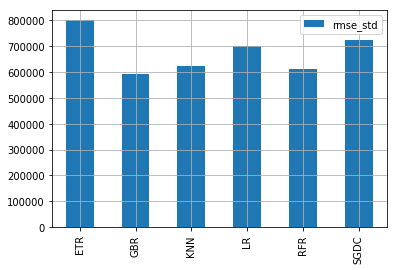

In [34]:
df[['rmse_std']].plot(kind='bar', grid=True);